In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#import tensorflow as tf
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import glob
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
'''NOTE : There are lots of types of fruits, In this kernel and I have classified only 17 of them. 
   If required, you can simply load more classes(fruits) [don't forget to update respective parameters as well]'''

'''Step 1 : Validating the dictionary'''
print(os.listdir("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test"))
# Any results you write to the current directory are saved as output.
'''Training folder contains train images where Test contains all test images,
   thus we are not going to split the images as it is already being done.
   In this kernel we are not going to seperate out the cross-validation set.
'''

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Dates', 'Eggplant', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Nectarine Flat', 'Nut

'Training folder contains train images where Test contains all test images,\n   thus we are not going to split the images as it is already being done.\n   In this kernel we are not going to seperate out the cross-validation set.\n'

In [2]:
'''Step 2: Loading helper functions'''
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(100,100,3), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(np.argmax(cls_true[i]),1)
        else:
            xlabel = "True: {0}, Pred: {1}".format(np.argmax(cls_true[i],1), np.argmax(cls_pred[i],1))

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

In [3]:
'''Step 3: loading data'''
X_train,Y_train,X_test,Y_test = [],[],[],[]
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Apple Braeburn/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(0)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Apple Braeburn/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(0)   

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Apple Golden 1/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(1)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Apple Golden 1/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(1)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Apple Golden 2/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(2)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Apple Golden 2/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(2)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Apple Golden 3/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(3)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Apple Golden 3/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(3)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Apple Granny Smith/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(4)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Apple Granny Smith/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(4)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Apple Red 1/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(5)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Apple Red 1/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(5)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Apple Red 2/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(6)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Apple Red 2/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(6)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Apple Red 3/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(7)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Apple Red 3/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(7)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Apple Red Delicious/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(8)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Apple Red Delicious/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(8)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Apple Red Yellow/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(9)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Apple Red Yellow/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(9)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Apricot/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(10)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Apricot/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(10)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Avocado/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(11)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Avocado/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(11)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Avocado ripe/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(12)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Avocado ripe/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(12)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Banana/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(13)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Banana/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(13)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Banana Red/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(14)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Banana Red/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(14)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Cactus fruit/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(15)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Cactus fruit/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(15)

for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Training/Cantaloupe 1/*"):
    X_train.append(np.asarray(Image.open(f)))
    Y_train.append(16)
for f in glob.iglob("D:/2éme SINT/deep learning/projet/fruits/fruits-360_dataset/fruits-360/Test/Cantaloupe 1/*"):
    X_test.append(np.asarray(Image.open(f)))
    Y_test.append(16)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_train = Y_train.reshape(X_train.shape[0],1)
Y_test = Y_test.reshape(X_test.shape[0],1)
Y_train = indices_to_one_hot(Y_train,17)
Y_test = indices_to_one_hot(Y_test,17)

print("shape of X_train : ",X_train.shape)
print("shape of Y_train : ",Y_train.shape)
print("shape of X_test : ",X_test.shape)
print("shape of Y_test : ",Y_test.shape)

shape of X_train :  (7724, 100, 100, 3)
shape of Y_train :  (7724, 17)
shape of X_test :  (2590, 100, 100, 3)
shape of Y_test :  (2590, 17)


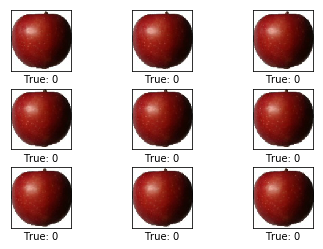

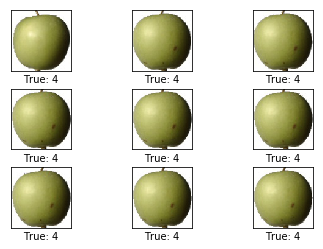

In [4]:
'''Step 4: validate loaded data/images'''
plot_images(X_train[1:10,:,:,:],Y_train[1:10,])
plot_images(X_train[2001:2010,:,:,:],Y_train[2001:2010,])

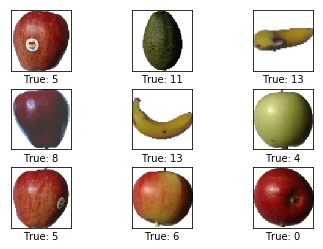

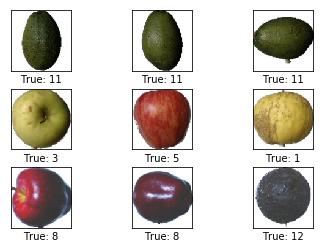

In [5]:
''' shuffling dataset '''

idx = np.random.permutation(len(X_train))
X_train,Y_train = X_train[idx], Y_train[idx]
idx = np.random.permutation(len(X_test))
X_test,Y_test = X_test[idx], Y_test[idx]
#plotting sample shuffled images
plot_images(X_train[1:10,:,:,:],Y_train[1:10,])
plot_images(X_train[2001:2010,:,:,:],Y_train[2001:2010,])

In [6]:
''' setting default parameters'''
pixel_depth = 255.0  
image_width = 100
image_height = 100
num_channels = 3
num_classes = 17
img_size = X_train.shape[1]
num_channels = X_train.shape[-1]
num_classes = Y_train.shape[1] 

In [7]:
'''Normalize images by simply deviding the value of each pixel by pixel_depth(255)'''
X_train = (X_train.astype(float) - 
                    pixel_depth / 2) / pixel_depth


X_test = (X_test.astype(float) - 
                    pixel_depth / 2) / pixel_depth

In [8]:
print("X_train shape :",X_train.shape)
print("Y_train shape :",Y_train.shape)
print("X_test shape :",X_test.shape)
print("Y_test shape :",Y_test.shape)

X_train shape : (7724, 100, 100, 3)
Y_train shape : (7724, 17)
X_test shape : (2590, 100, 100, 3)
Y_test shape : (2590, 17)


In [9]:
''' Reset tensor flow graph '''
from tensorflow.python.framework import ops
ops.reset_default_graph()

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\pc\AppData\Local\Continuum\anacond

In [11]:
'''  defining model and optimize function'''
# Convolutional Layer 1.
filter_size1 = 5          # Convolution filters are 5 x 5 pixels.
num_filters1 = 16         # 

# Convolutional Layer 2.
filter_size2 = 5          # Convolution filters are 5 x 5 pixels.
num_filters2 = 32         # 

# Fully-connected layer.
fc_size = 64


In [12]:
def conv_weight_variable(layer_name, shape):
    """ Retrieve an existing variable with the given layer name 
    """
    return tf.get_variable(layer_name, shape=shape, initializer=tf.contrib.layers.xavier_initializer_conv2d())

def fc_weight_variable(layer_name, shape):
    """ Retrieve an existing variable with the given layer name
    """
    return tf.get_variable(layer_name, shape=shape, initializer=tf.contrib.layers.xavier_initializer())

def bias_variable(shape):
    """ Creates a new bias variable
    """
    return tf.Variable(tf.constant(0.0, shape=shape))


In [13]:

def conv_layer(input,               # The previous layer
                layer_name,         # Layer name
                num_input_channels, # Num. channels in prev. layer
                filter_size,        # Width and height of each filter
                num_filters,        # Number of filters
                pooling=True):      # Use 2x2 max-pooling

    # Shape of the filter-weights for the convolution
    shape = [filter_size, filter_size, num_input_channels, num_filters]

    # Create new filters with the given shape
    weights = conv_weight_variable(layer_name, shape=shape)
    
    # Create new biases, one for each filter
    biases = bias_variable(shape=[num_filters])

    # Create the TensorFlow operation for convolution
    layer = tf.nn.conv2d(input=input,
                         filter=weights,
                         strides=[1, 1, 1, 1],
                         padding='SAME') # with zero padding

    # Add the biases to the results of the convolution
    layer += biases
    
    # Rectified Linear Unit (RELU)
    layer = tf.nn.relu(layer)

    # Down-sample the image resolution?
    if pooling:
        layer = tf.nn.max_pool(value=layer,
                               ksize=[1, 2, 2, 1],
                               strides=[1, 2, 2, 1],
                               padding='SAME')

    # Return the resulting layer and the filter-weights
    return layer, weights



In [14]:

def flatten_layer(layer):
    # Get the shape of the input layer.
    layer_shape = layer.get_shape()

    # The number of features is: img_height * img_width * num_channels
    num_features = layer_shape[1:4].num_elements()
    
    # Reshape the layer to [num_images, num_features].
    layer_flat = tf.reshape(layer, [-1, num_features])

    # Return the flattened layer and the number of features.
    return layer_flat, num_features



def fc_layer(input,        # The previous layer
             layer_name,   # The layer name
             num_inputs,   # Num. inputs from prev. layer
             num_outputs,  # Num. outputs
             relu=True):   # Use RELU?

    # Create new weights and biases.
    weights = fc_weight_variable(layer_name, shape=[num_inputs, num_outputs])
    biases = bias_variable(shape=[num_outputs])

    # Calculate the layer activation
    layer = tf.matmul(input, weights) + biases

    # Use ReLU?
    if relu:
        layer = tf.nn.relu(layer)

    return layer


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


x = tf.placeholder(tf.float32, shape=(None, img_size, img_size, num_channels), name='x')
y_true = tf.placeholder(tf.float32, shape=[None, 17], name='y_true')

y_true_cls = tf.argmax(y_true, dimension=1)
keep_prob = tf.placeholder(tf.float32)

conv_1, w_c1 = conv_layer(input=x,
                          layer_name="conv_1",
                          num_input_channels=num_channels,
                          filter_size=filter_size1,
                          num_filters=num_filters1, pooling=True)


conv_2, w_c2 = conv_layer(input=conv_1,
                          layer_name="conv_2",
                          num_input_channels=num_filters1,
                          filter_size=filter_size2,
                          num_filters=num_filters2,
                          pooling=True)

# Apply dropout after the pooling operation
dropout = tf.nn.dropout(conv_2, keep_prob)




layer_flat, num_features = flatten_layer(dropout)

layer_flat


fc_1 = fc_layer(input=layer_flat,
                layer_name="fc_1",
                num_inputs=num_features,
                num_outputs=fc_size,
                relu=True)



fc_2 = fc_layer(input=fc_1,
                layer_name="fc_2",
                num_inputs=fc_size,
                num_outputs=num_classes,
                relu=False)



y_pred = tf.nn.softmax(fc_2)

# The class-number is the index of the largest element.
y_pred_cls = tf.argmax(y_pred, dimension=1)

# Calcualte the cross-entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=fc_2, labels=y_true)

# Take the average of the cross-entropy for all the image classifications.
cost = tf.reduce_mean(cross_entropy)

# Global step is required to compute the decayed learning rate
global_step = tf.Variable(0)

# Apply exponential decay to the learning rate
learning_rate = tf.train.exponential_decay(0.05, global_step, 10000, 0.96, staircase=True)

# Construct a new Adam optimizer
optimizer = tf.train.AdagradOptimizer(learning_rate).minimize(cost, global_step=global_step)

# Predicted class equals the true class of each image?
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

# Cast predictions to float and calculate the mean
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

session = tf.Session()
session.run(tf.global_variables_initializer())

# Number of training samples in each iteration 
batch_size = 64

# Keep probability in dropout layer
dropout = 0.5

total_iterations = 0


In [27]:

def optimize(num_iterations, display_step):
    
    # Ensure we update the global variable rather than a local copy.
    global total_iterations

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for step in range(num_iterations):

        offset = (step * batch_size) % (Y_train.shape[0] - batch_size)
        batch_data = X_train[offset:(offset + batch_size), :, :, :]
        batch_labels = Y_train[offset:(offset + batch_size), :]
        
        feed_dict_train = {x: batch_data, y_true: batch_labels, keep_prob: dropout}

        # Run the optimizer using this batch of training data.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every display_step
        if step % display_step == 0:
            
            # Calculate the accuracy on the training-set.
            batch_acc = session.run(accuracy, feed_dict=feed_dict_train)
            print("Minibatch accuracy at step %d: %.4f" % (step, batch_acc))
            
            # Calculate the accuracy on the validation-set
            validation_acc = session.run(accuracy, {x: X_test, y_true: Y_test, keep_prob: 1.0})
            print("Validation accuracy: %.4f" % validation_acc)

    # Update the total number of iterations performed.
    total_iterations += num_iterations

    # Difference between start and end-times.
    time_diff = time.time() - start_time
    
    print("Time usage: " + str(timedelta(seconds=int(round(time_diff)))))

In [ ]:
optimize(num_iterations=200, display_step=10)

In [ ]:
test_pred = session.run(y_pred_cls, {x: X_test[1:10,], keep_prob: 1.0})
print(test_pred[:10])
print(np.argmax(Y_test[1:10],1))

In [ ]:
''' lets plot the images of test set along with the results'''
plot_images(X_test[1:10,:,:,:],Y_test[1:10,])